<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Proyecto_final_Ciencia_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
ruta = '/content/drive/MyDrive/Fis_comp_lll_proyecto/p4.csv'

In [11]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from os import X_OK
from IPython.display import display


from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [12]:

df=pd.read_csv(ruta)#df original
df_backup=df.copy()#copia del df por si acaso
df.info()#leer información del df
print(df.head(15))#imprimir las primeras 15 lineas del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86910 entries, 0 to 86909
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  86910 non-null  int64  
 1   var1    86853 non-null  float64
 2   var2    86840 non-null  float64
 3   var3    86856 non-null  float64
 4   var4    86845 non-null  float64
 5   var5    86841 non-null  float64
 6   var6    86851 non-null  float64
 7   var7    86840 non-null  float64
 8   var8    86854 non-null  float64
 9   var9    85910 non-null  float64
 10  var10   85910 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 7.3 MB
    target        var1       var2      var3      var4       var5       var6  \
0        0  122.039062  48.921877  0.085125 -0.008021   1.689799  13.096054   
1        0   83.308297  29.378626  2.134467  4.915023   6.962789  19.682489   
2        0   90.504789  52.047910  0.897928 -3.266864   2.885591  26.294114   
3        0   96.272218  51.745945  0.691518

No todas las variables tienen la misma cantidad de datos, tenemos filas vacias, entonces queremos llenar estos valores

In [13]:
print(df.describe()) #Se googleo esta función para ver las estadísticas y saber los valores extremos de las columnas

             target            var1            var2            var3  \
count  86910.000000    86853.000000    86840.000000    86856.000000   
mean       0.091693      441.411290      595.681750      319.631015   
std        0.288593    18268.918820    23503.832431    17952.895108   
min        0.000000    -9999.000000    -9999.000000    -9999.000000   
25%        0.000000       91.886103       40.551278       -0.303669   
50%        0.000000      113.640623       46.752452        0.281286   
75%        0.000000      133.048077       52.547232        1.038738   
max        1.000000  1000000.000000  1000000.000000  1000000.000000   

                 var4            var5            var6            var7  \
count    86845.000000    86841.000000    86851.000000    86840.000000   
mean       493.944550      319.546868      333.623043      327.276425   
std      22246.948876    17631.124865    17629.707943    17954.478739   
min      -9999.000000    -9999.000000    -9999.000000    -9999.00000

In [7]:
#Vemos la homogeneidad de los datos, con esto podemos ver cual es el ruido más notorio
print(df['target'].value_counts(sort=True))#contamos la cantidad de datos que se repiten y los ordenamos de mayor a menor por frecuencia
for i in df.columns:
  print(i)
  print(df[i].value_counts(sort=True))

target
0    78941
1     7969
Name: count, dtype: int64
target
target
0    78941
1     7969
Name: count, dtype: int64
var1
var1
-9999.000000       29
 1000000.000000    29
 106.710938        11
 106.648438         9
 122.203125         8
                   ..
 171.218093         1
 96.392506          1
 77.178268          1
 116.113199         1
 74.671024          1
Name: count, Length: 79398, dtype: int64
var2
var2
 1000000.000000    48
-9999.000000       31
 43.360608          3
 46.770007          3
 51.178849          3
                   ..
 52.657739          1
 54.433795          1
 42.082317          1
 38.475367          1
 51.123368          1
Name: count, Length: 85885, dtype: int64
var3
var3
-9999.000000       28
 1000000.000000    28
 0.471104           3
-0.152479           3
-0.483727           2
                   ..
 0.529007           1
 2.231938           1
-0.109002           1
 2.556407           1
-0.092635           1
Name: count, Length: 85911, dtype: int64
var4

Hay que eliminar los valores exteremos, para limpiar las columnas y después obtener la media de las columnas y usar ese criterio para rellenar las filas vacias que existen

Esta linea no se ejecuta

In [8]:
#Este código no se implementó al final, pero ayuda a eliminar las columnas de valores atípicos
x=df.iloc[:,1:] #columnas de las variables
y=df.iloc[:,0] #columna del target

#Aquí se eliminan los extremos de manera arbitraria con el criterio de >= o <= 3000
dropear=pd.DataFrame()
for i in range(0,10):
  dropear=pd.concat([dropear,x[x.iloc[:,i] >= 3000]])
  dropear=pd.concat([dropear,x[x.iloc[:,i] <= -3000]])

drop_index=dropear.index
x_sin_extremos = x.iloc[:].drop(drop_index)
target_sin_extremos = y.iloc[:].drop(drop_index)

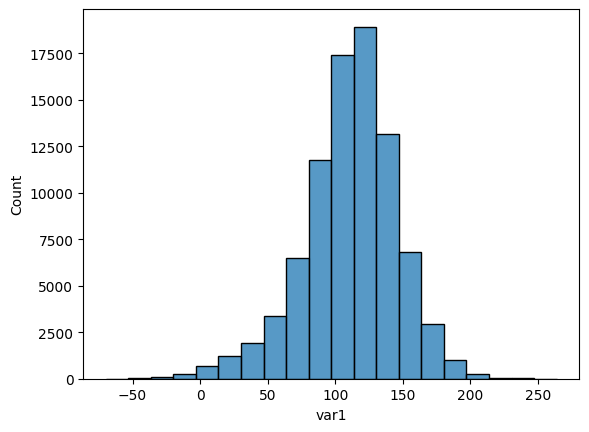

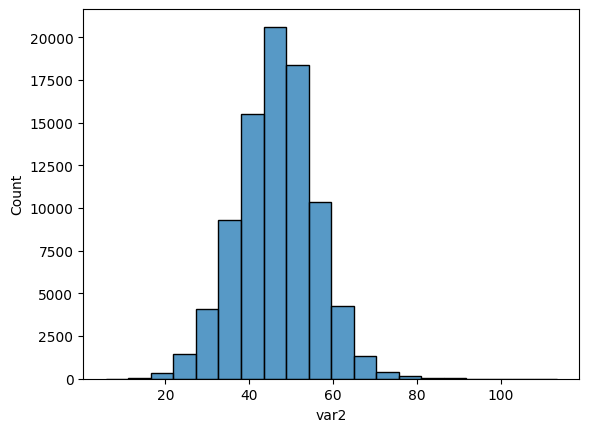

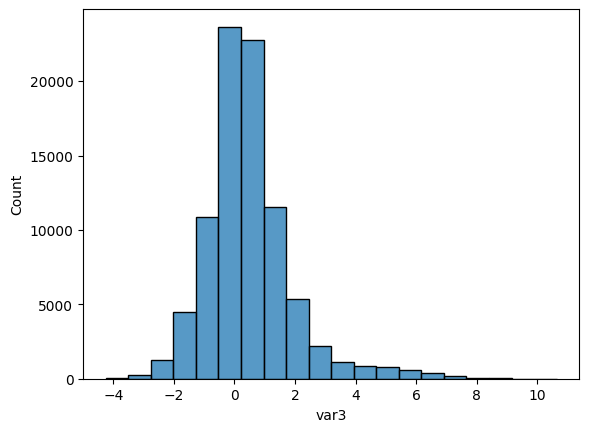

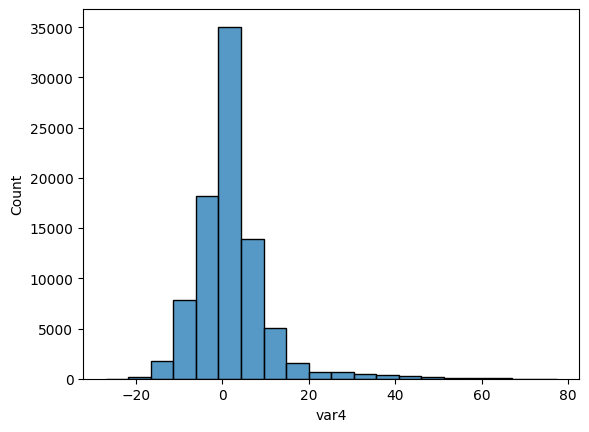

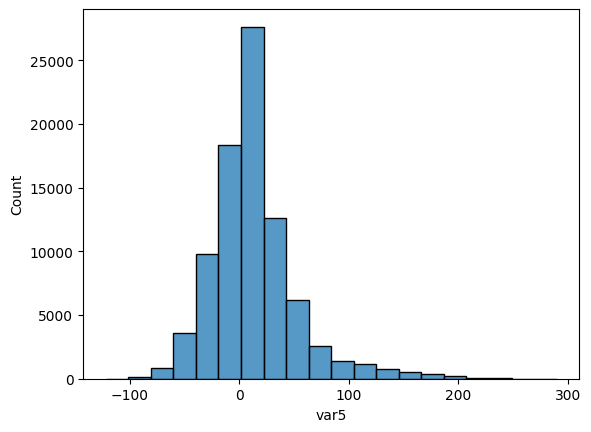

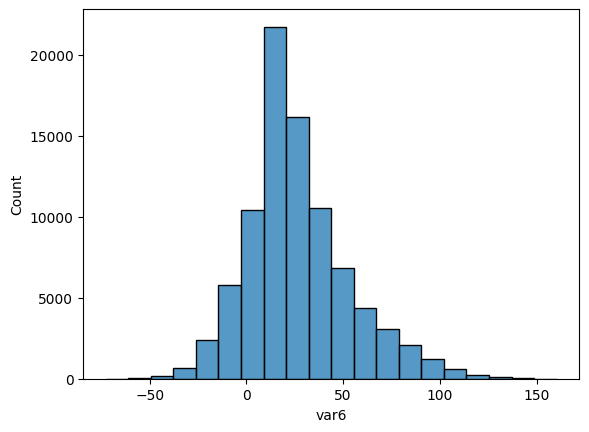

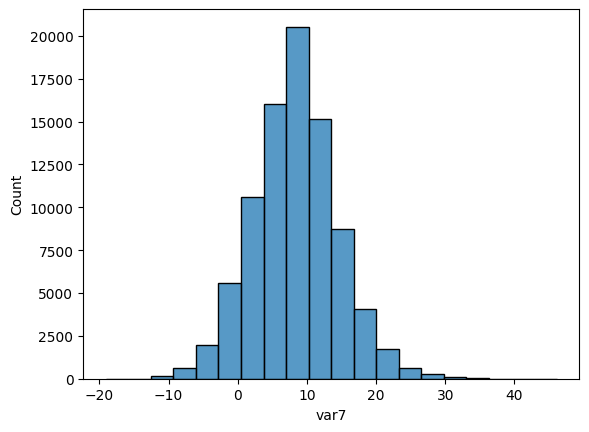

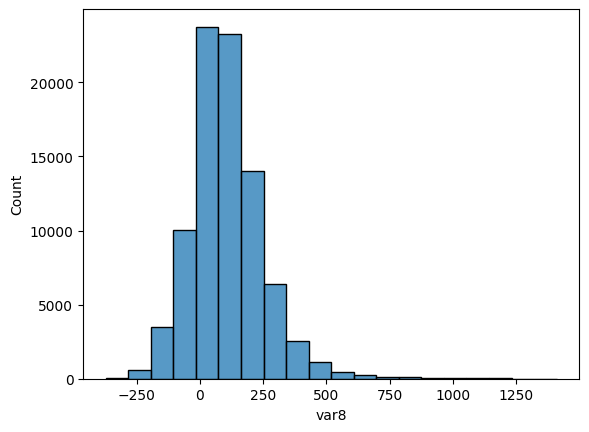

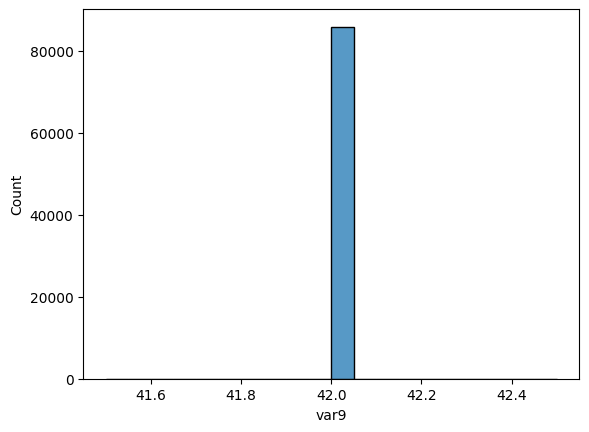

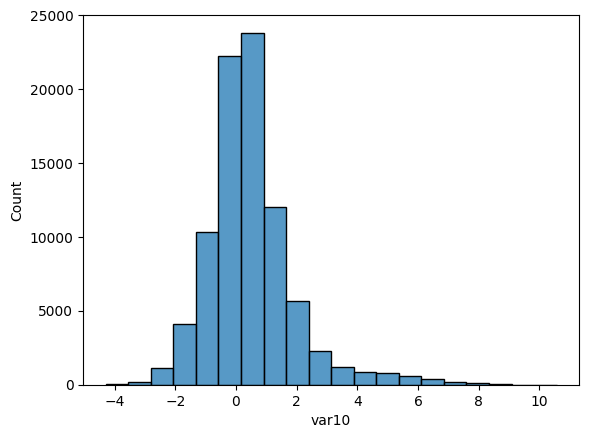

In [74]:
for i in x.columns: #si se ve gaussiano
  sns.histplot(x_sin_extremos[i],bins=20)
  plt.show()

In [75]:
#Esto es para ver cuántos teníamos antes vs cuántos tenemos ahora
# después de eliminar los valores extremos.
print(target_sin_extremos.value_counts(sort=True))
print(y.value_counts(sort=True))

target
0    78489
1     7921
Name: count, dtype: int64
target
0    78941
1     7969
Name: count, dtype: int64


In [76]:
df_ext=x_sin_extremos
df_ext["target"]=target_sin_extremos

In [77]:

#También podemos hacer otro dataset, que además de no tener los valores
# extremos, rellene los NaNs con el promedio:
df_ext_sinna=df_ext.dropna()
#Reemplazar valores faltantes con el promedio
df_ext_na=pd.DataFrame()
for i in range(11):
  #df_ext_na=df_ext.iloc[:,i].fillna(np.mean(df_ext.iloc[:,i]),inplace=True)
  promedio=np.mean(df_ext.iloc[:,i])
  new_vals=df_ext.iloc[:,i].fillna(promedio)
  df_ext_na=pd.concat([df_ext_na,new_vals],axis=1)

x_ext_na=df_ext_na.iloc[:,:-1]
y_ext_na=df_ext_na.iloc[:,-1]

y_ext_sinna=df_ext_sinna.iloc[:,-1]
x_ext_sinna=df_ext_sinna.iloc[:,:-1]

In [78]:
#ya todas las columnas tienen el mismo tamaño

#Hay un detalle que me llama la atención. En var 9, por alguna razón
# se agrega un 32.187002, pero yo pensaría que en vez de ponerle eso
# al nan, debería de aparecer el promedio (41.94). Ni idea de si hay algo
# que esté haciendo mal.

df_ext_na.describe()

var1          var2          var3          var4          var5  \
count  86410.000000  86410.000000  86410.000000  86410.000000  86410.000000   
mean     110.931077     46.548752      0.481964      1.805768     12.678184   
std       34.816836      9.264688      1.441312      8.381208     39.885624   
min      -69.880644      5.756669     -4.249417    -26.983087   -121.890669   
25%       91.912698     40.557631     -0.303026     -2.486570     -9.044671   
50%      113.611616     46.737034      0.281976      0.484998      4.483696   
75%      133.025858     52.529457      1.037167      4.748357     28.155406   
max      263.899304    113.381120     10.641146     77.304693    289.624979   

               var6          var7          var8     var9         var10  \
count  86410.000000  86410.000000  86410.000000  86410.0  86410.000000   
mean      26.339941      8.305837    105.081171     42.0      0.481983   
std       26.442842      6.102517    144.006832      0.0      1.437366   
min      -72.711217    -19.076932   -372.709689     42.0     -4.292660   
25%       10.482325      4.358805     12.767095     42.0     -0.298345   
50%       21.725788      8.305818     90.790371     42.0      0.287233   
75%       39.648769     11.997071    179.515512     42.0      1.030832   
max      160.330014     46.085449   1409.781258     42.0     10.569095   

             target  
count  86410.000000  
mean       0.091668  
std        0.288558  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Aqui se vuelve a compilar

Vamos a usar el z-score para detectar valores muy atípicos y reemplazarlos por NaN, sin borrar filas

In [14]:
# Separar variables (X) y target (y)
x = df.iloc[:, 1:]   # variables
y = df.iloc[:, 0]    # target

x = x.replace(to_replace=["", " ", "None", "none", "NaN",-9999], value=np.nan)
# Calcular media y desviación estándar
mu = x.mean()
sigma = x.std()   # por defecto ddof=1;

# Evitar división por cero en columnas constantes
sigma_safe = sigma.replace(0, np.nan)
z_scores = (x - mu) / sigma_safe

# Definir umbral de outliers (|z| > 3 desv.)
umbral = 3.0
mask_outlier_z = z_scores.abs() > umbral

# Reemplazar sólo esos valores por NaN, conservando filas/tamaño
x_con_nan = x.mask(mask_outlier_z, np.nan)

# Reconstruir un df completo con target + variables con NaN en los valores extremos
df_con_nan = df.copy()
df_con_nan.iloc[:, 1:] = x_con_nan
target_con_nan = df_con_nan.iloc[:, 0]


In [15]:
print(target_con_nan.value_counts(sort=True))#contamos la cantidad de datos que se repiten tras limpiar
for col in x_con_nan.columns:
    print(col)
    print(x_con_nan[col].value_counts(sort=True, dropna=False))

target
0    78941
1     7969
Name: count, dtype: int64
var1
var1
NaN           115
106.710938     11
106.648438      9
112.914062      8
123.031250      8
             ... 
171.218093      1
96.392506       1
77.178268       1
116.113199      1
74.671024       1
Name: count, Length: 79397, dtype: int64
var2
var2
NaN          149
44.727883      3
43.360608      3
46.770007      3
51.178849      3
            ... 
52.657739      1
54.433795      1
42.082317      1
38.475367      1
51.123368      1
Name: count, Length: 85884, dtype: int64
var3
var3
 NaN         110
-0.152479      3
 0.471104      3
 0.217080      2
 6.200816      2
            ... 
 0.529007      1
 2.231938      1
-0.109002      1
 2.556407      1
-0.092635      1
Name: count, Length: 85910, dtype: int64
var4
var4
 NaN          134
-3.685999       3
 5.547828       3
-0.321580       3
 10.549303      2
             ... 
 5.141818       1
-1.088706       1
 12.647965      1
-0.430350       1
 1.770682       1
Name: count,

In [16]:
imputer = SimpleImputer(strategy='median')
x_imputado = imputer.fit_transform(x_con_nan)

# Volver a DataFrame, manteniendo nombres de columnas e índices
x_imputado = pd.DataFrame(x_imputado, columns=x.columns, index=x.index)

In [17]:
# Unimos de nuevo target + variables imputadas
df_final = pd.concat([y, x_imputado], axis=1)# concatena horizontal

# Para que el DataFrame se siga llamando df:
df = df_final.copy()


In [18]:
# target después de la limpieza (realmente igual que antes, no lo tocamos)
print(df.iloc[:, 0].value_counts(sort=True))

# Recorrer columnas de variables
for col in df.columns[1:]:
    print(col)
    print(df[col].value_counts(sort=True))

# Crear resumen por columna
resumen = pd.DataFrame({
    "no_nulos": df.notnull().sum(),
    "nulos": df.isnull().sum(),
    "total_filas": len(df),
    "valores_unicos": df.nunique(dropna=True),
    "tipo_dato": df.dtypes
})
print(resumen)

df.describe()


target
0    78941
1     7969
Name: count, dtype: int64
var1
var1
113.640623    116
106.710938     11
106.648438      9
118.656250      8
112.914062      8
             ... 
171.218093      1
96.392506       1
77.178268       1
116.113199      1
74.671024       1
Name: count, Length: 79396, dtype: int64
var2
var2
46.749777    150
44.727883      3
43.360608      3
46.770007      3
51.178849      3
            ... 
45.329512      1
52.657739      1
54.433795      1
42.082317      1
43.632802      1
Name: count, Length: 85883, dtype: int64
var3
var3
 0.281286    110
-0.152479      3
 0.471104      3
 0.217080      2
 6.200816      2
            ... 
 0.529007      1
 2.231938      1
-0.109002      1
 2.556407      1
-0.092635      1
Name: count, Length: 85910, dtype: int64
var4
var4
 0.480464     134
-3.685999       3
 5.547828       3
-0.321580       3
 10.549303      2
             ... 
 5.141818       1
-1.088706       1
 12.647965      1
-0.430350       1
 1.770682       1
Name: count,

target          var1          var2          var3          var4  \
count  86910.000000  86910.000000  86910.000000  86910.000000  86910.000000   
mean       0.091693    110.930094     46.553192      0.481813      1.802472   
std        0.288593     34.795572      9.260574      1.441178      8.377535   
min        0.000000    -69.880644      5.756669     -4.249417    -26.983087   
25%        0.000000     91.929310     40.566278     -0.301720     -2.483362   
50%        0.000000    113.640623     46.749777      0.281286      0.480464   
75%        0.000000    132.999839     52.528421      1.036511      4.743046   
max        1.000000    263.899304    113.381120     10.641146     77.304693   

               var5          var6          var7          var8     var9  \
count  86910.000000  86910.000000  86910.000000  86910.000000  86910.0   
mean      12.660432     26.326122      8.304191    105.065704     42.0   
std       39.868474     26.434242      6.098521    143.908494      0.0   
min     -121.890669    -72.711217    -19.076932   -372.709689     42.0   
25%       -9.023410     10.487646      4.363536     12.845016     42.0   
50%        4.454849     21.703478      8.300540     90.774009     42.0   
75%       28.127769     39.629118     11.987124    179.466731     42.0   
max      289.624979    160.330014     46.085449   1409.781258     42.0   

              var10  
count  86910.000000  
mean       0.357078  
std        1.168127  
min       -3.840397  
25%       -0.292521  
50%        0.258996  
75%        0.934011  
max        4.804785

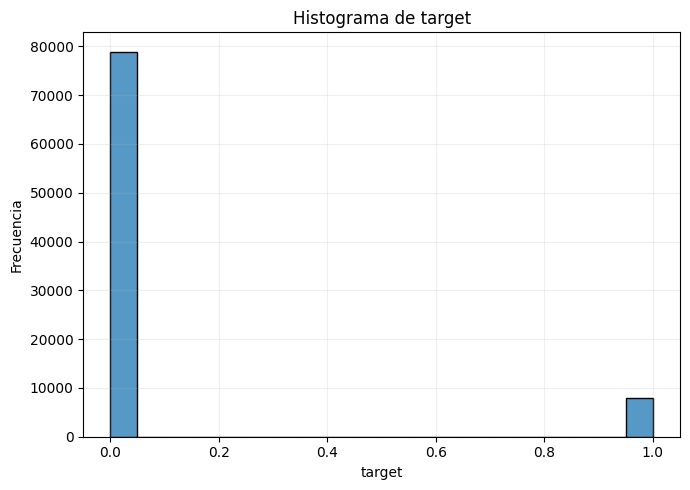

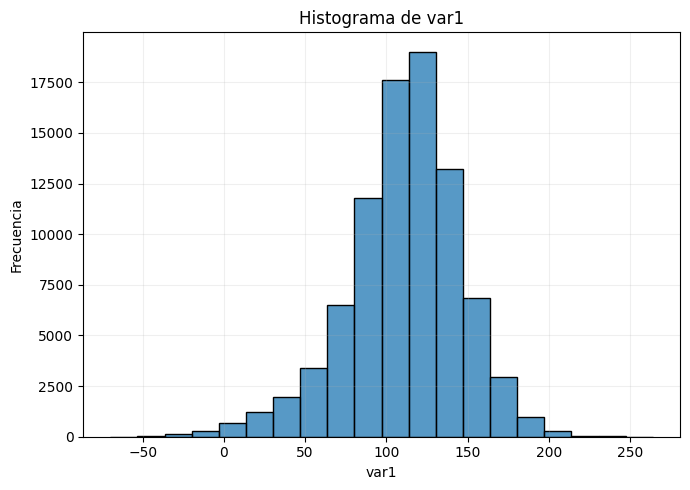

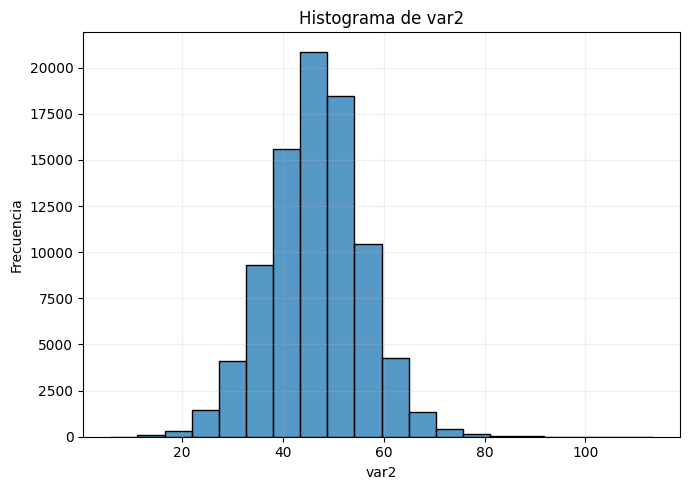

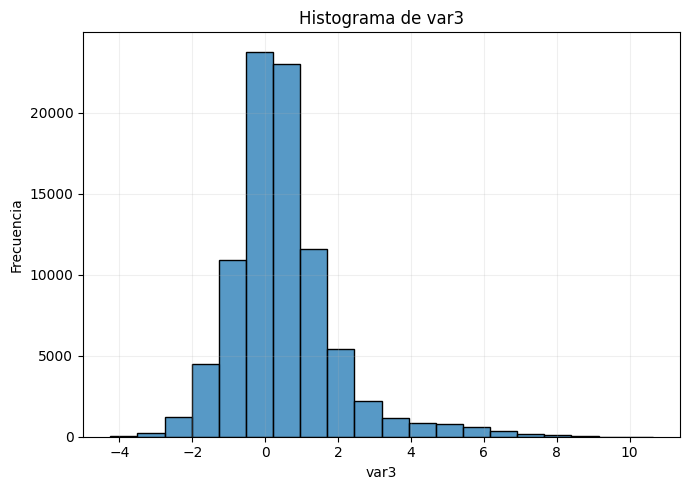

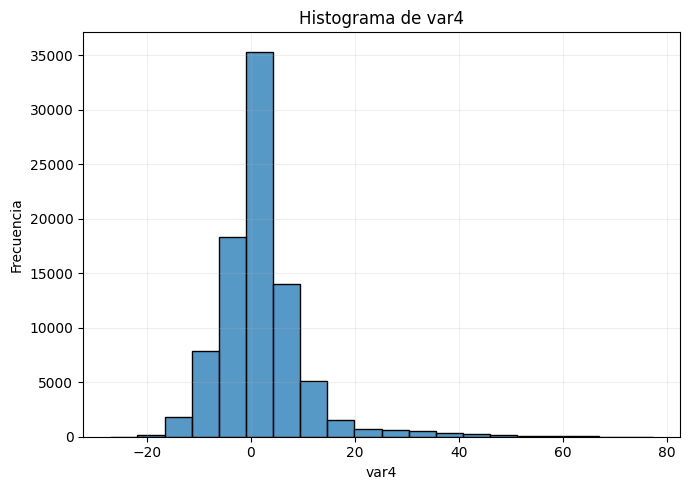

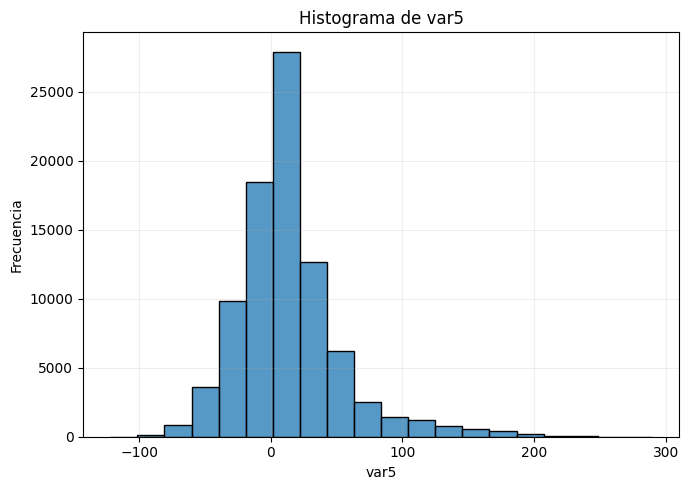

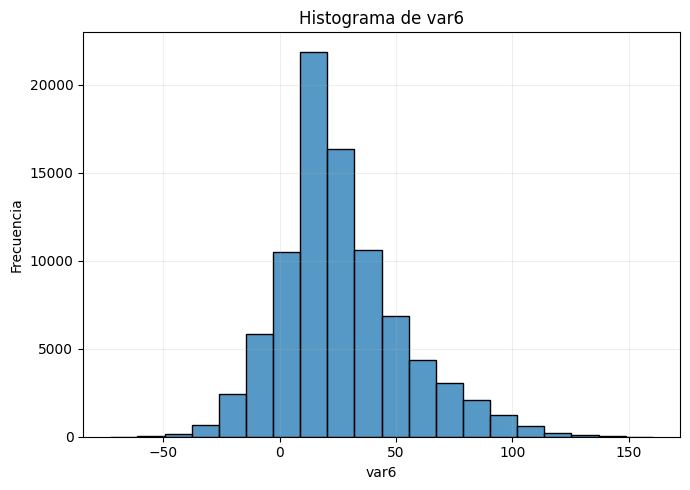

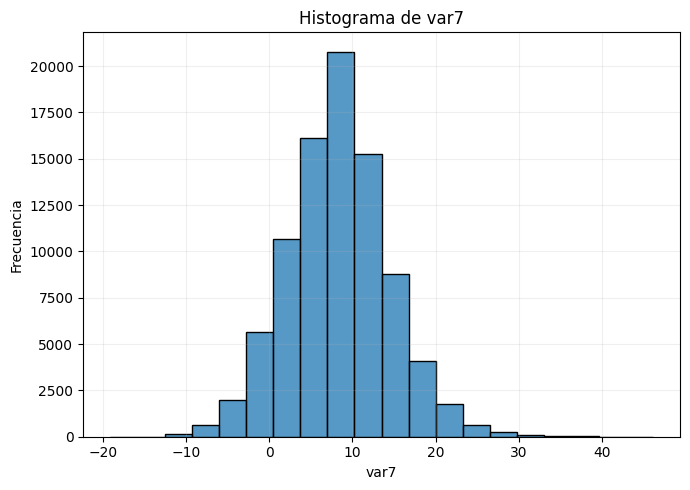

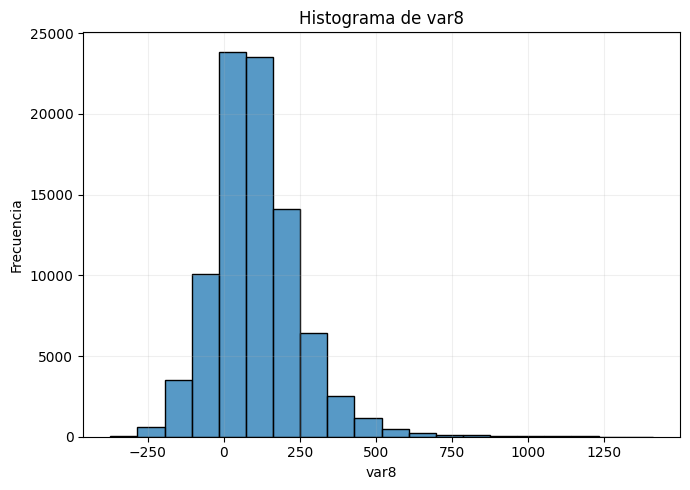

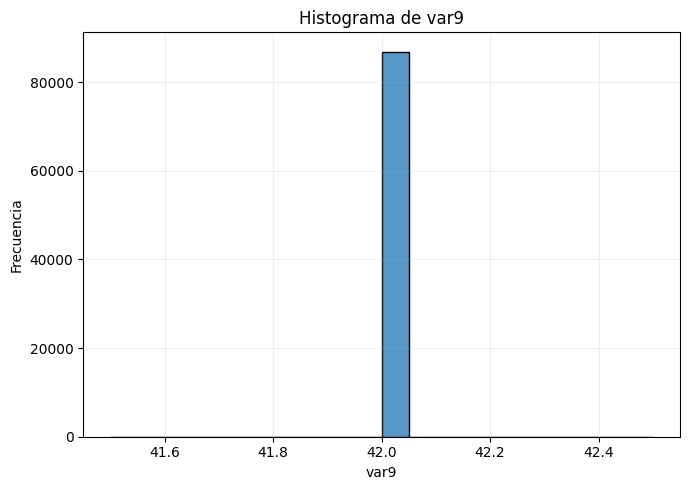

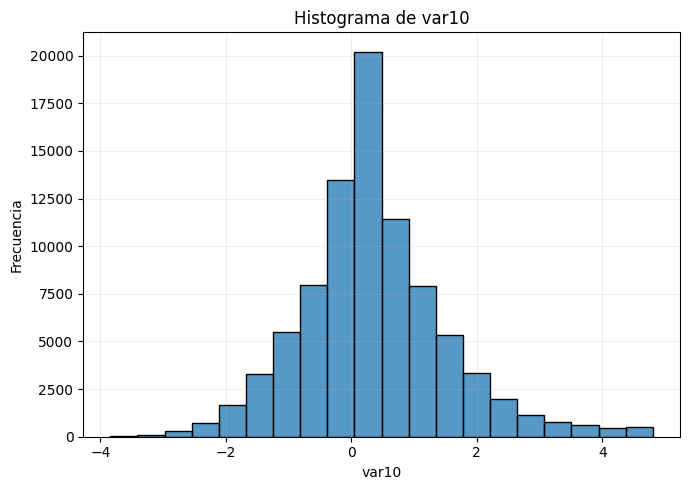

In [14]:
for col in df.columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(df[col], bins=20)

    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

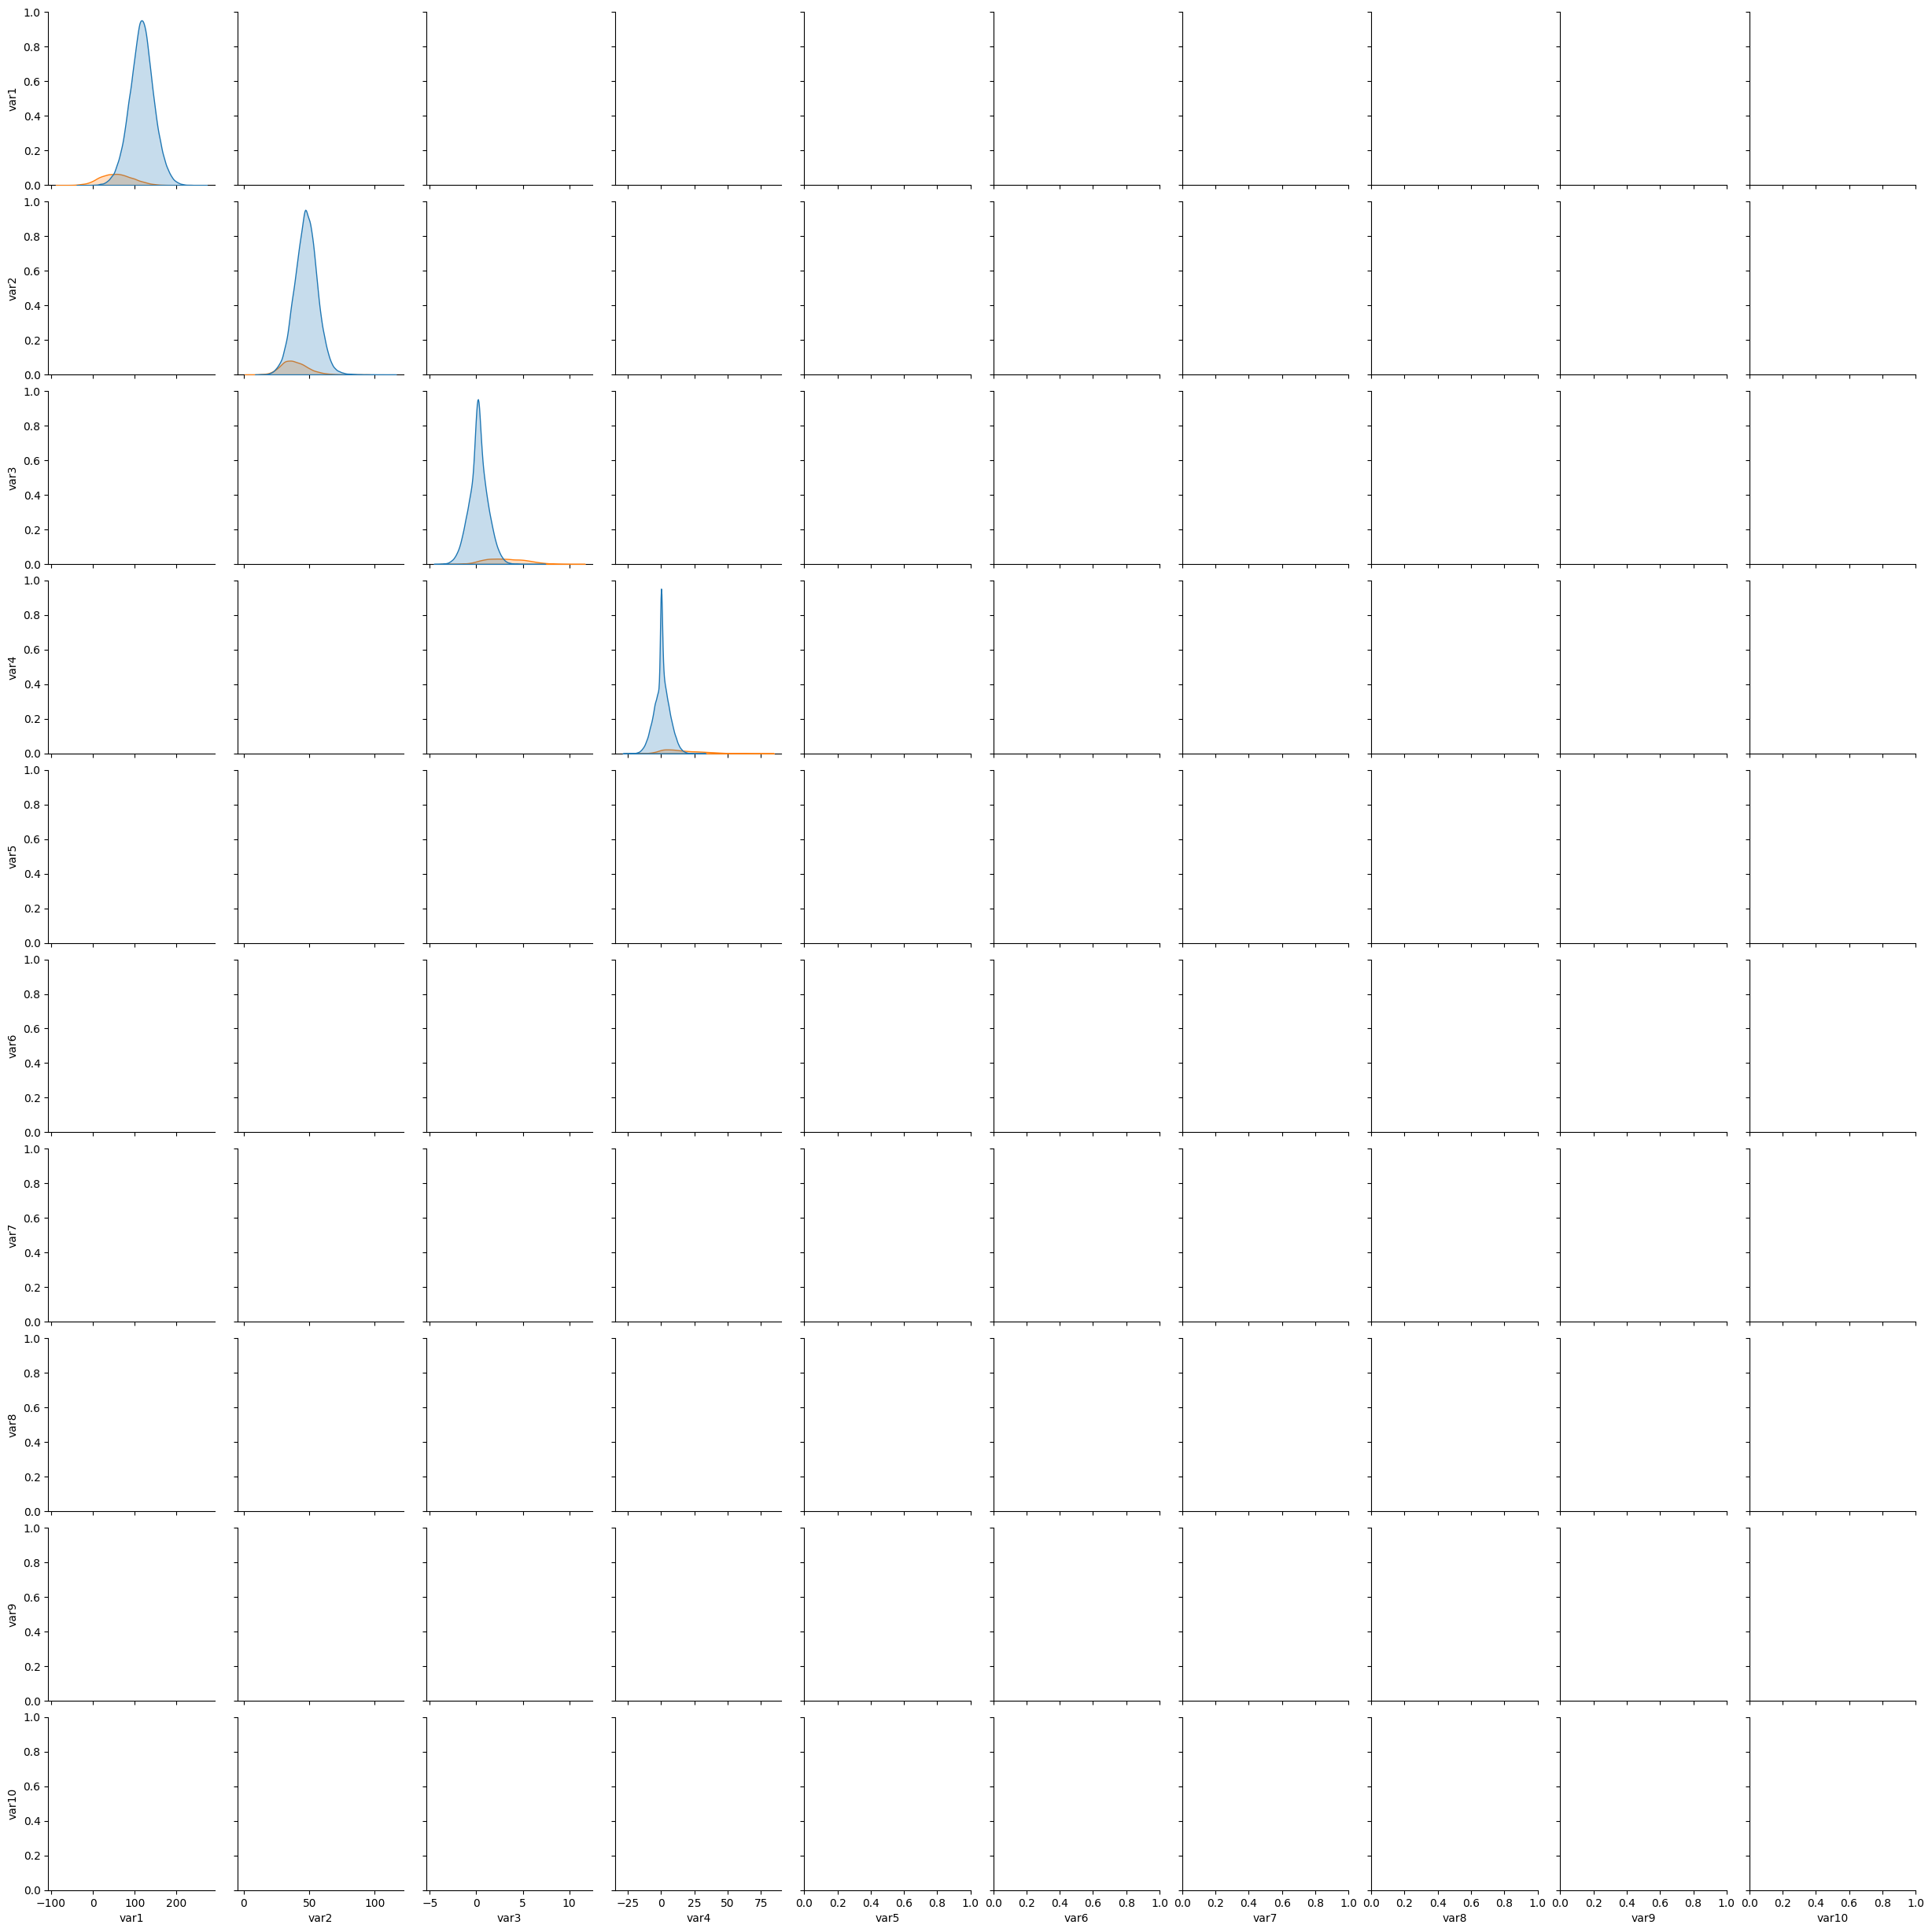

In [134]:
#Cada fila/columna de la matriz es una variable del df.
sns.pairplot(df,hue="target")


El pairplot muestra que algunas variables, permiten distinguir visualmente entre las clases target=0 y target=1, lo que sugiere que serán útiles para modelos de clasificación. También se observa que la columna var9 es constante, por lo que debe eliminarse ya que no aporta ninguna información. Las distribuciones de muchas variables no son normales, con sesgos o colas largas, por lo que sería preferible imputar valores faltantes usando la mediana en lugar de la media como se hizo previamente y considerar transformaciones para estabilizar la varianza. Además, algunas relaciones entre variables muestran patrones no lineales o agrupamientos

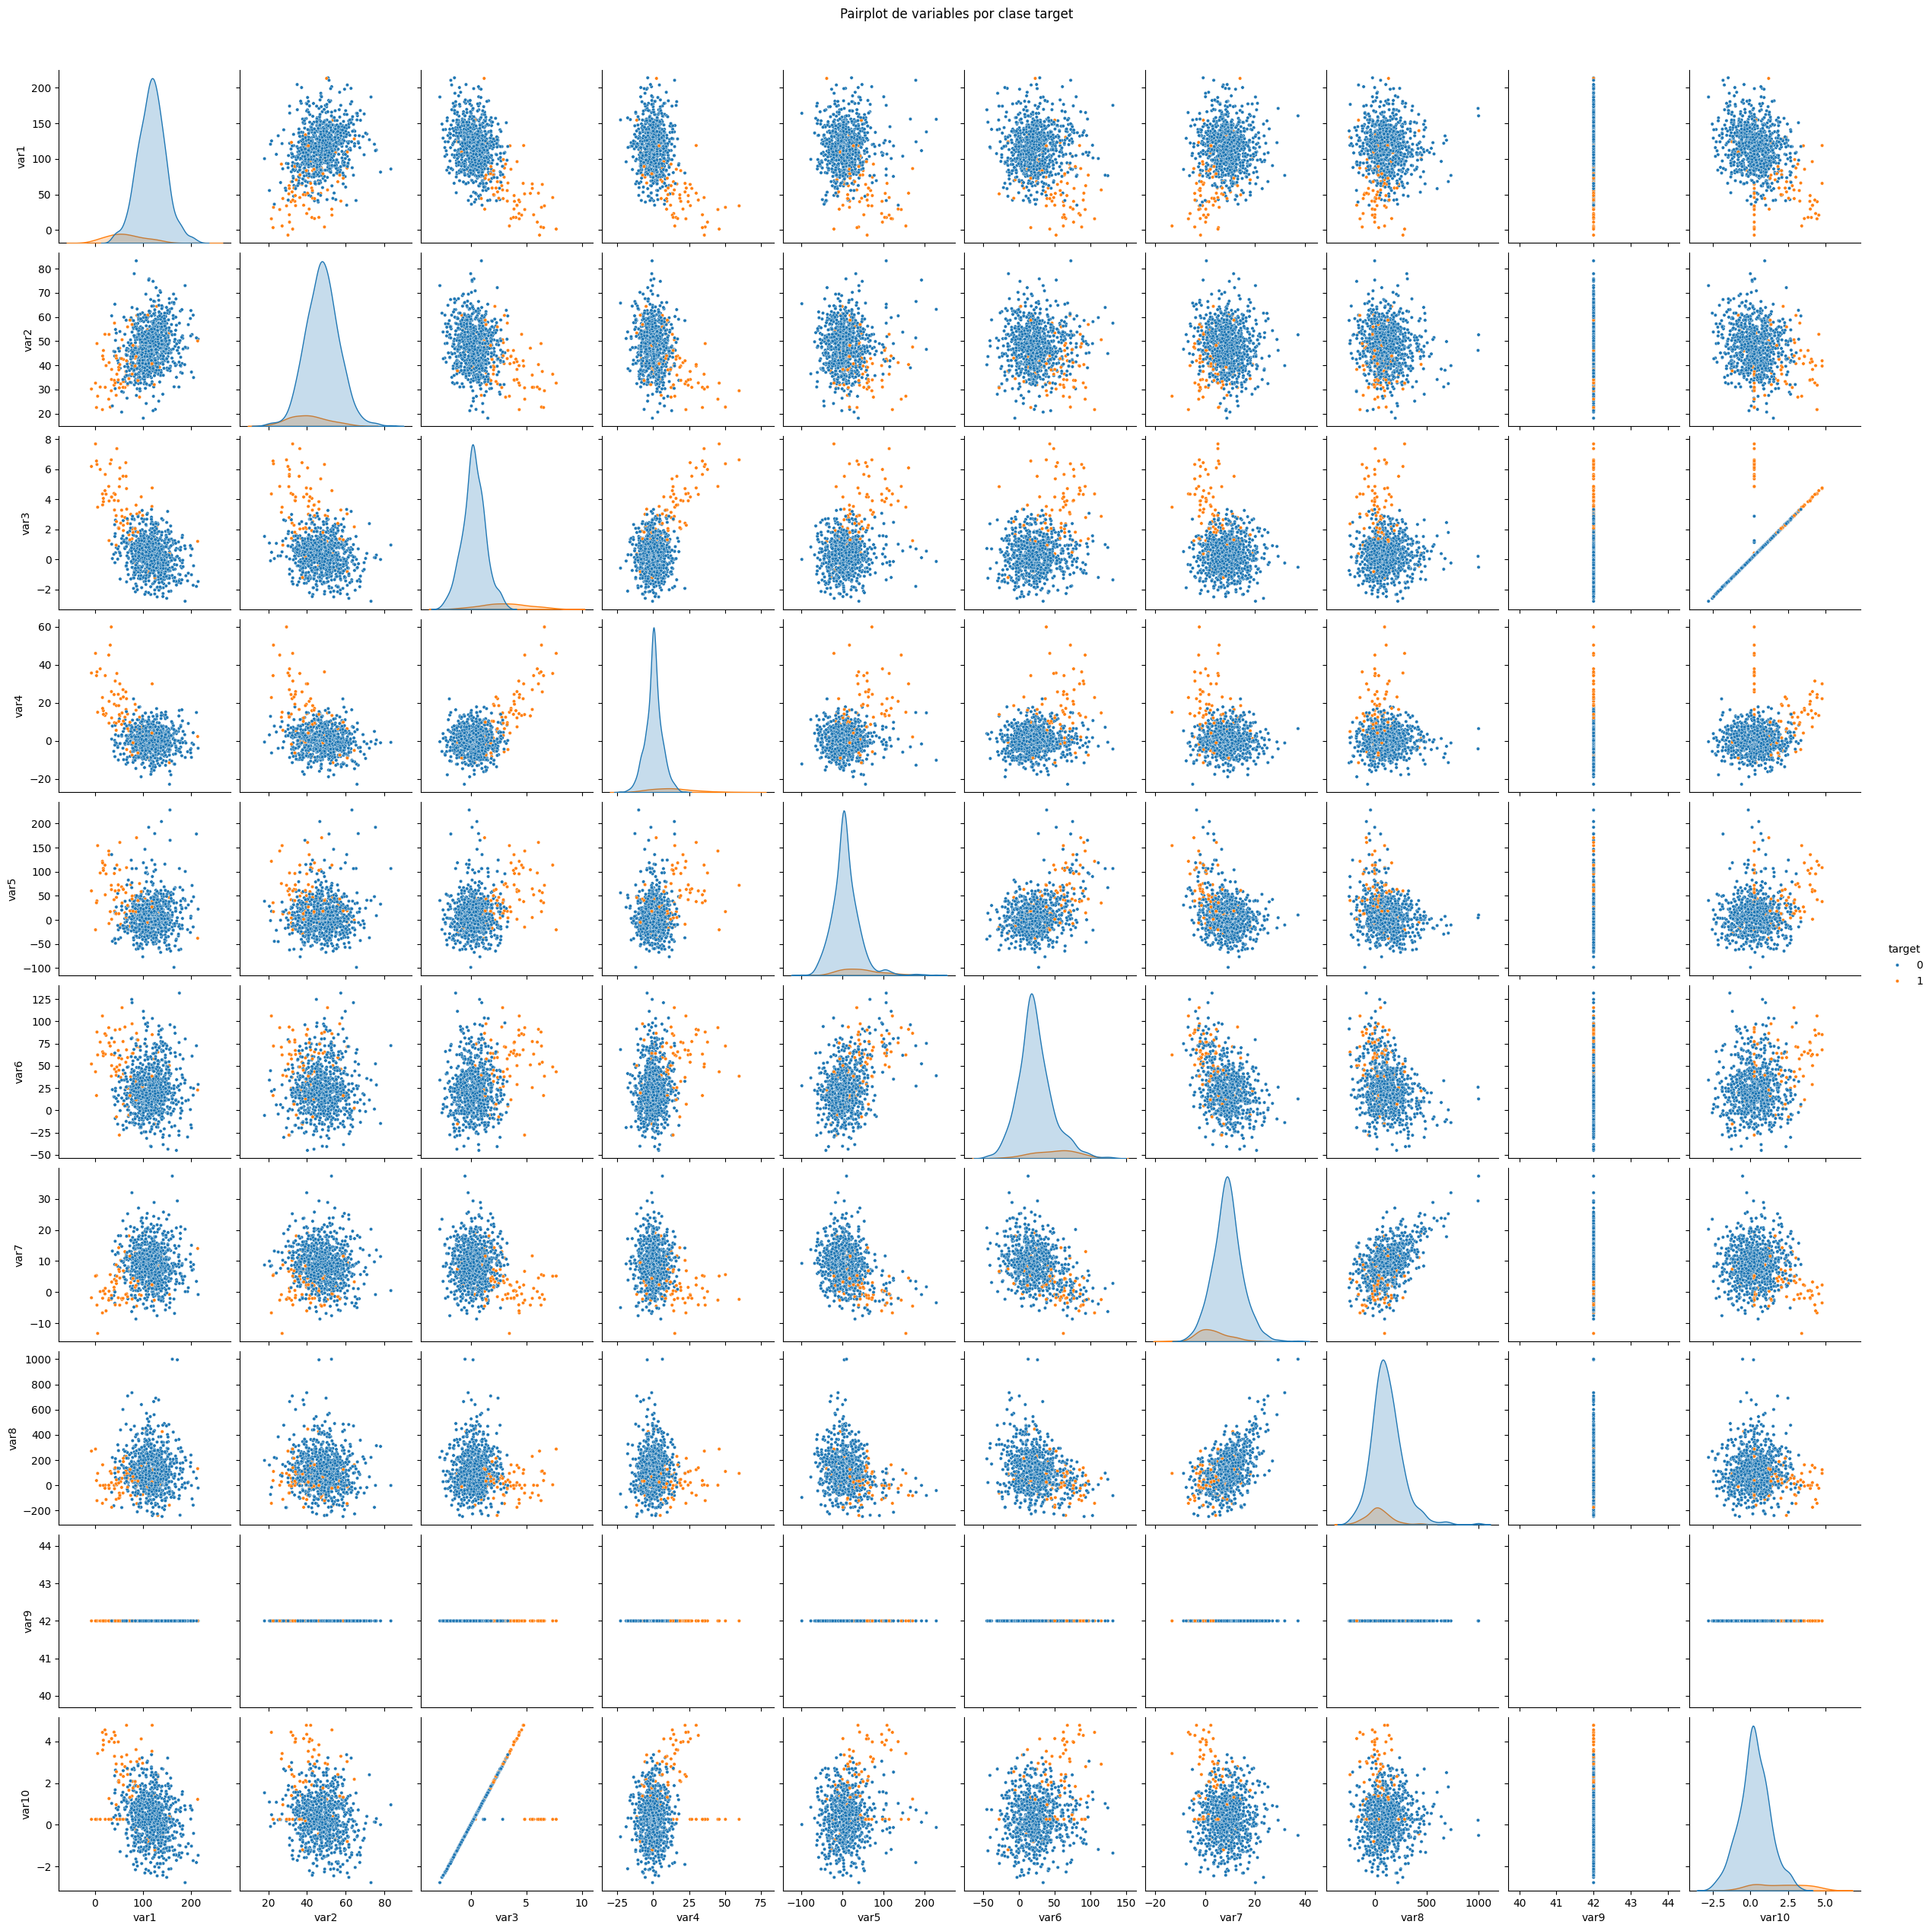

In [135]:
# Tomar una muestra aleatoria de 1000 filas
df_sample = df.sample(n=1000, random_state=42)
# Graficar pairplot
sns.pairplot(df_sample, hue="target", diag_kind="kde", plot_kws={"alpha": 1, "s": 10})
plt.suptitle("Pairplot de variables por clase target", y=1.02)
plt.show()


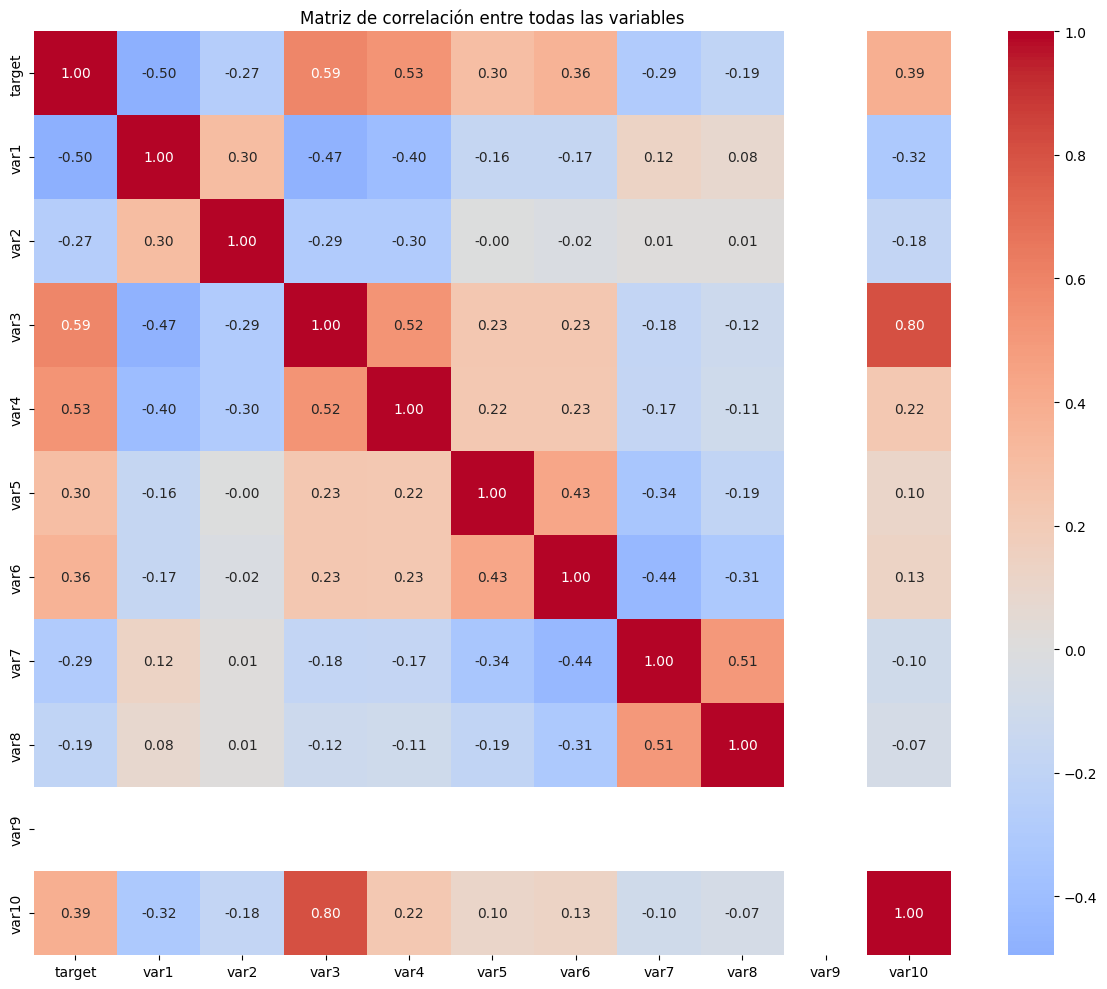

In [110]:
# Matriz de correlación
# Calcular la matriz de correlación solo entre columnas numéricas
corr = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre todas las variables")
plt.tight_layout()
plt.show()

In [19]:
# Calcular matriz de correlación completa
corr = df.corr()

# Extraer la fila (o columna) correspondiente a 'target'
corr_target = corr["target"].drop("target")  # eliminar target vs target (es 1.0)

# Ordenar correlaciones de mayor a menor (por valor absoluto)
corr_ordenadas = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

print("Correlaciones de cada variable con 'target':\n")
print(corr_ordenadas.round(3))

Correlaciones de cada variable con 'target':

var3     0.587
var4     0.527
var1    -0.495
var10    0.387
var6     0.361
var5     0.296
var7    -0.286
var2    -0.269
var8    -0.193
var9       NaN
Name: target, dtype: float64


No se compila:
Con spearman y kendall

In [ ]:
plt.figure(figsize=(10, 8))
corr_spear = df_sample.corr(method="spearman")
sns.heatmap(corr_spear, annot=True, square=True, cmap="coolwarm")
plt.title("Matriz de correlación (Spearman) en la muestra")
plt.tight_layout()
plt.show()

target_col = "target"

# Matriz Spearman
corr_spear = df.corr(method="kendall",min_periods = 1 )

# Correlación de cada variable con el target
corr_with_target = corr_spear[target_col].drop(target_col)
print("Correlaciones Spearman con target:")
print(corr_with_target.sort_values(ascending=False))

# Umbral de selección
umbral_corr = 0.3
selected_features = corr_with_target[corr_with_target.abs() >= umbral_corr].index.tolist()

print("\nFeatures seleccionadas (|Spearman| >= 0.3):")
print(selected_features)

X_sel = df[selected_features]


Aquí ya se compila, ahora veremos si hay filas duplicadas


In [20]:
df[df.duplicated()]


Empty DataFrame
Columns: [target, var1, var2, var3, var4, var5, var6, var7, var8, var9, var10]
Index: []

In [21]:
df_duplicates = df[df.duplicated()]
if df_duplicates.empty:
    print("No filas duplicadas")
else:
    print("Duplicado:")
    display(df_duplicates)

No filas duplicadas


In [22]:
columnas_duplicadas = []

for i, col_i in enumerate(df.columns):
    for j in range(i + 1, len(df.columns)):
        col_j = df.columns[j]
        if df[col_i].equals(df[col_j]):
            columnas_duplicadas.append(col_j)

print(columnas_duplicadas)
df = df.drop(columns=columnas_duplicadas)

[]


Aplicar PCA

In [ ]:
# Extraer únicamente las variables (todas las columnas excepto 'target')
X = df.drop('target', axis=1)

# Estandarizar las variables (media 0, varianza 1)
# PCA es muy sensible a la escala, por eso es importante este paso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar PCA usando TODOS los componentes posibles
#    (n_components=None por defecto → tantas PCs como variables)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con todas las componentes principales
df_pca = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

# Mostrar las primeras filas transformadas
print("Primeras filas del DataFrame transformado por PCA:")
display(df_pca.head(15))

# Varianza explicada por cada componente principal
# ==========================
print("\nProporción de varianza explicada por cada componente principal:")
var_exp = pd.Series(
    pca.explained_variance_ratio_,
    index=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
)
display(var_exp)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o',
    linestyle='--'
)
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# Verificar que la suma de las razones de varianza explicada sea 1
#    (o muy cercana, por errores numéricos)
# ==========================
s = 0
for r in pca.explained_variance_ratio_:
    s += r
    print(s)  # va imprimiendo la suma acumulada; la última debería ser 1.0


# No ejecutar

Si mejor eliminamos las filas en lugar de cambiar el NAN

Forma de los valores propios: (10,)
Forma de los vectores propios: (10, 10)


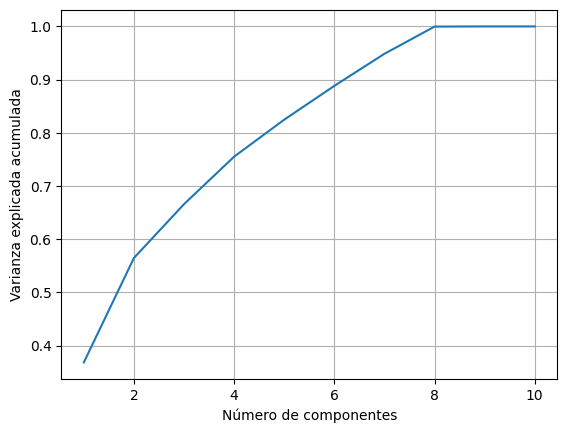

[0.36841104 0.56474591 0.66589326 0.75523825 0.8247323  0.88825484
 0.9485334  0.99967513 1.         1.        ]
8


In [85]:
M_mean = x_ext_na.mean()
M_std = x_ext_na.std()
Zm = (x_ext_na - M_mean) / M_std
Zm = Zm.fillna(0)
c = Zm.cov()
eigenvalues, eigenvectors = np.linalg.eig(c)
#print('Valores propios:\n', eigenvalues)
print('Forma de los valores propios:', eigenvalues.shape)
print('Forma de los vectores propios:', eigenvectors.shape)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

n_components = np.argmax(explained_var >= 0.99) + 1
print(explained_var)
print(n_components)

In [80]:
u = eigenvectors[:, :n_components]
pca_component = pd.DataFrame(u, index = x.columns)


Z_pca = Zm @ pca_component
Z_pca_c = Z_pca
#print(Z_pca.iloc[[0,1]].corr())
print(Z_pca.shape)

(86910, 4)


Primeras 15 filas del DataFrame transformado por PCA (usando x_ext_na):


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -0.907038  0.385096  0.174284  0.111965  0.026807  0.101618 -0.104865   
1   2.139205  0.759723 -1.376152 -0.012092  0.460202 -0.607935 -0.310901   
2  -0.144827  0.460682  0.481100  0.525390 -0.630144 -0.629855  0.181482   
3  -0.791430  1.159564  0.473737  0.554744 -0.545929 -0.478741  0.631667   
4   0.224157  0.156078  0.246311 -1.624725 -0.386684  0.580662  0.851495   
5  -0.356423 -0.944540 -0.842161  0.599195 -0.475530 -0.075275 -0.678016   
6  -1.361743  0.110905 -0.695114 -0.126112 -0.550018  0.801009  0.646556   
7  -0.427213 -1.101957 -0.157069  0.476906  0.760166 -0.250444 -0.892240   
8  -0.159923  0.100791 -0.825639  0.875023  1.492210 -0.076753 -0.576437   
9   1.717616 -0.182527 -0.005602 -0.086729 -0.590201 -0.073669 -0.182628   
10 -1.018275  1.095041 -0.090327 -1.296250  2.043725 -0.587381 -1.708222   
11 -0.777244  0.603586  0.240099  0.096518  0.095237  0.015147 -0.061061   
12 -0.337361 -0.871298 -0.439916  0.157394  0.148457  0.123345  0.098501   
13 -0.458897  0.845487  1.241735  0.726115  0.342105 -0.374988  0.053854   
14  0.044013 -0.366676  0.044436 -0.335015 -0.091150  1.008010  0.764468   

         PC8       PC9  PC10  
0   0.010713  0.000214   0.0  
1  -0.776360 -0.012202   0.0  
2   0.531534 -0.000570   0.0  
3  -1.227223 -0.004933   0.0  
4  -0.953846  0.000203   0.0  
5   0.666524  0.001194   0.0  
6  -0.880064  0.004736   0.0  
7   0.145815  0.002126   0.0  
8  -0.493036  0.000368   0.0  
9  -0.558745 -0.004066   0.0  
10  0.596268  0.000196   0.0  
11  0.108711 -0.000981   0.0  
12 -0.068177  0.001174   0.0  
13 -0.904930 -0.003954   0.0  
14 -0.690557 -0.000922   0.0


Proporción de varianza explicada por cada componente principal:


PC1     0.368411
PC2     0.196335
PC3     0.101147
PC4     0.089345
PC5     0.069494
PC6     0.063523
PC7     0.060279
PC8     0.051142
PC9     0.000325
PC10    0.000000
dtype: float64

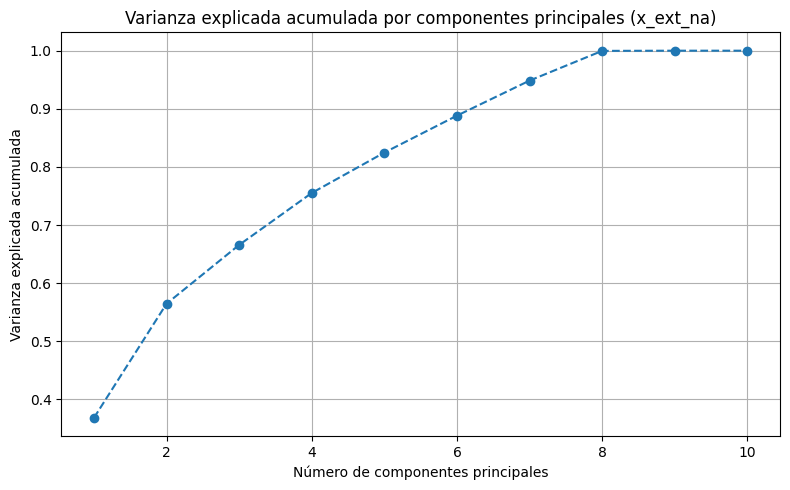


Suma acumulada de la varianza explicada:
0.36841103666673997
0.5647459141101433
0.665893261114076
0.7552382494344827
0.8247323031121202
0.8882548365281484
0.9485333982088003
0.9996751261482001
1.0000000000000002
1.0000000000000002


In [87]:
X = x_ext_na.copy()   # Trabajar sobre una copia

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

print("Primeras 15 filas del DataFrame transformado por PCA (usando x_ext_na):")
display(df_pca.head(15))

print("\nProporción de varianza explicada por cada componente principal:")
var_exp = pd.Series(
    pca.explained_variance_ratio_,
    index=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
)
display(var_exp)


plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o',
    linestyle='--'
)
plt.title('Varianza explicada acumulada por componentes principales (x_ext_na)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

suma_acumulada = 0
print("\nSuma acumulada de la varianza explicada:")
for r in pca.explained_variance_ratio_:
    suma_acumulada += r
    print(suma_acumulada)

In [95]:
u = eigenvectors[:, :n_components]
pca_component = pd.DataFrame(u, x_ext_sinna.columns,
                             columns = ['PCA1', 'PCA2'])

plt.figure(figsize =(5, 7))
sns.heatmap(pca_component, annot=True, cmap='coolwarm')
plt.show()


Z_pca = Zm @ pca_component
Z_pca.columns = ['PCA1', 'PCA2']
print(Z_pca)

Z_pca['target'] = y_ext_sinna.map({0: 'Maligno (0)', 1: 'Benigno (1)'})
plt.figure(figsize=(4,4))
sns.scatterplot(data=Z_pca, x="PCA1", y="PCA2", hue="target")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

ValueError: Shape of passed values is (10, 8), indices imply (10, 2)

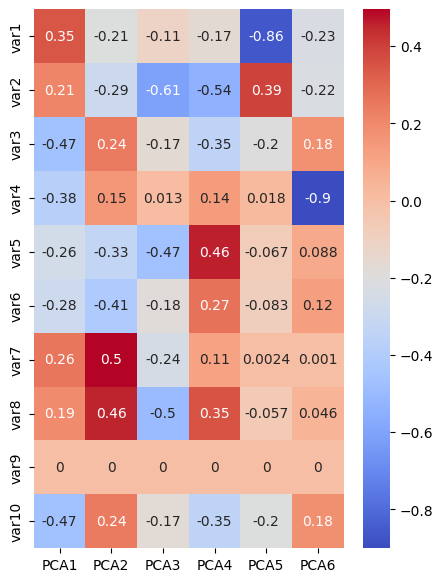

In [89]:
u = eigenvectors[:, :6]
pca_component = pd.DataFrame(u, x_ext_sinna.columns,
                             columns = ['PCA1', 'PCA2',"PCA3","PCA4","PCA5","PCA6"])

plt.figure(figsize =(5, 7))
sns.heatmap(pca_component, annot=True, cmap='coolwarm')
plt.show()


Z_pca = Zm @ pca_component

In [20]:
A=["var3","var10"]
for i in A:
  sns.histplot(x_ext_na[i],bins=20,alpha=0.3)
  plt.xlim(-10,10)
plt.show()

NameError: name 'x_ext_na' is not defined

No hace falta hacer PCA, podemos quitar manualmente la column 9 y 10 que se ven redundantes

# Aqui ya se compila

Entrenar modelos de árboles

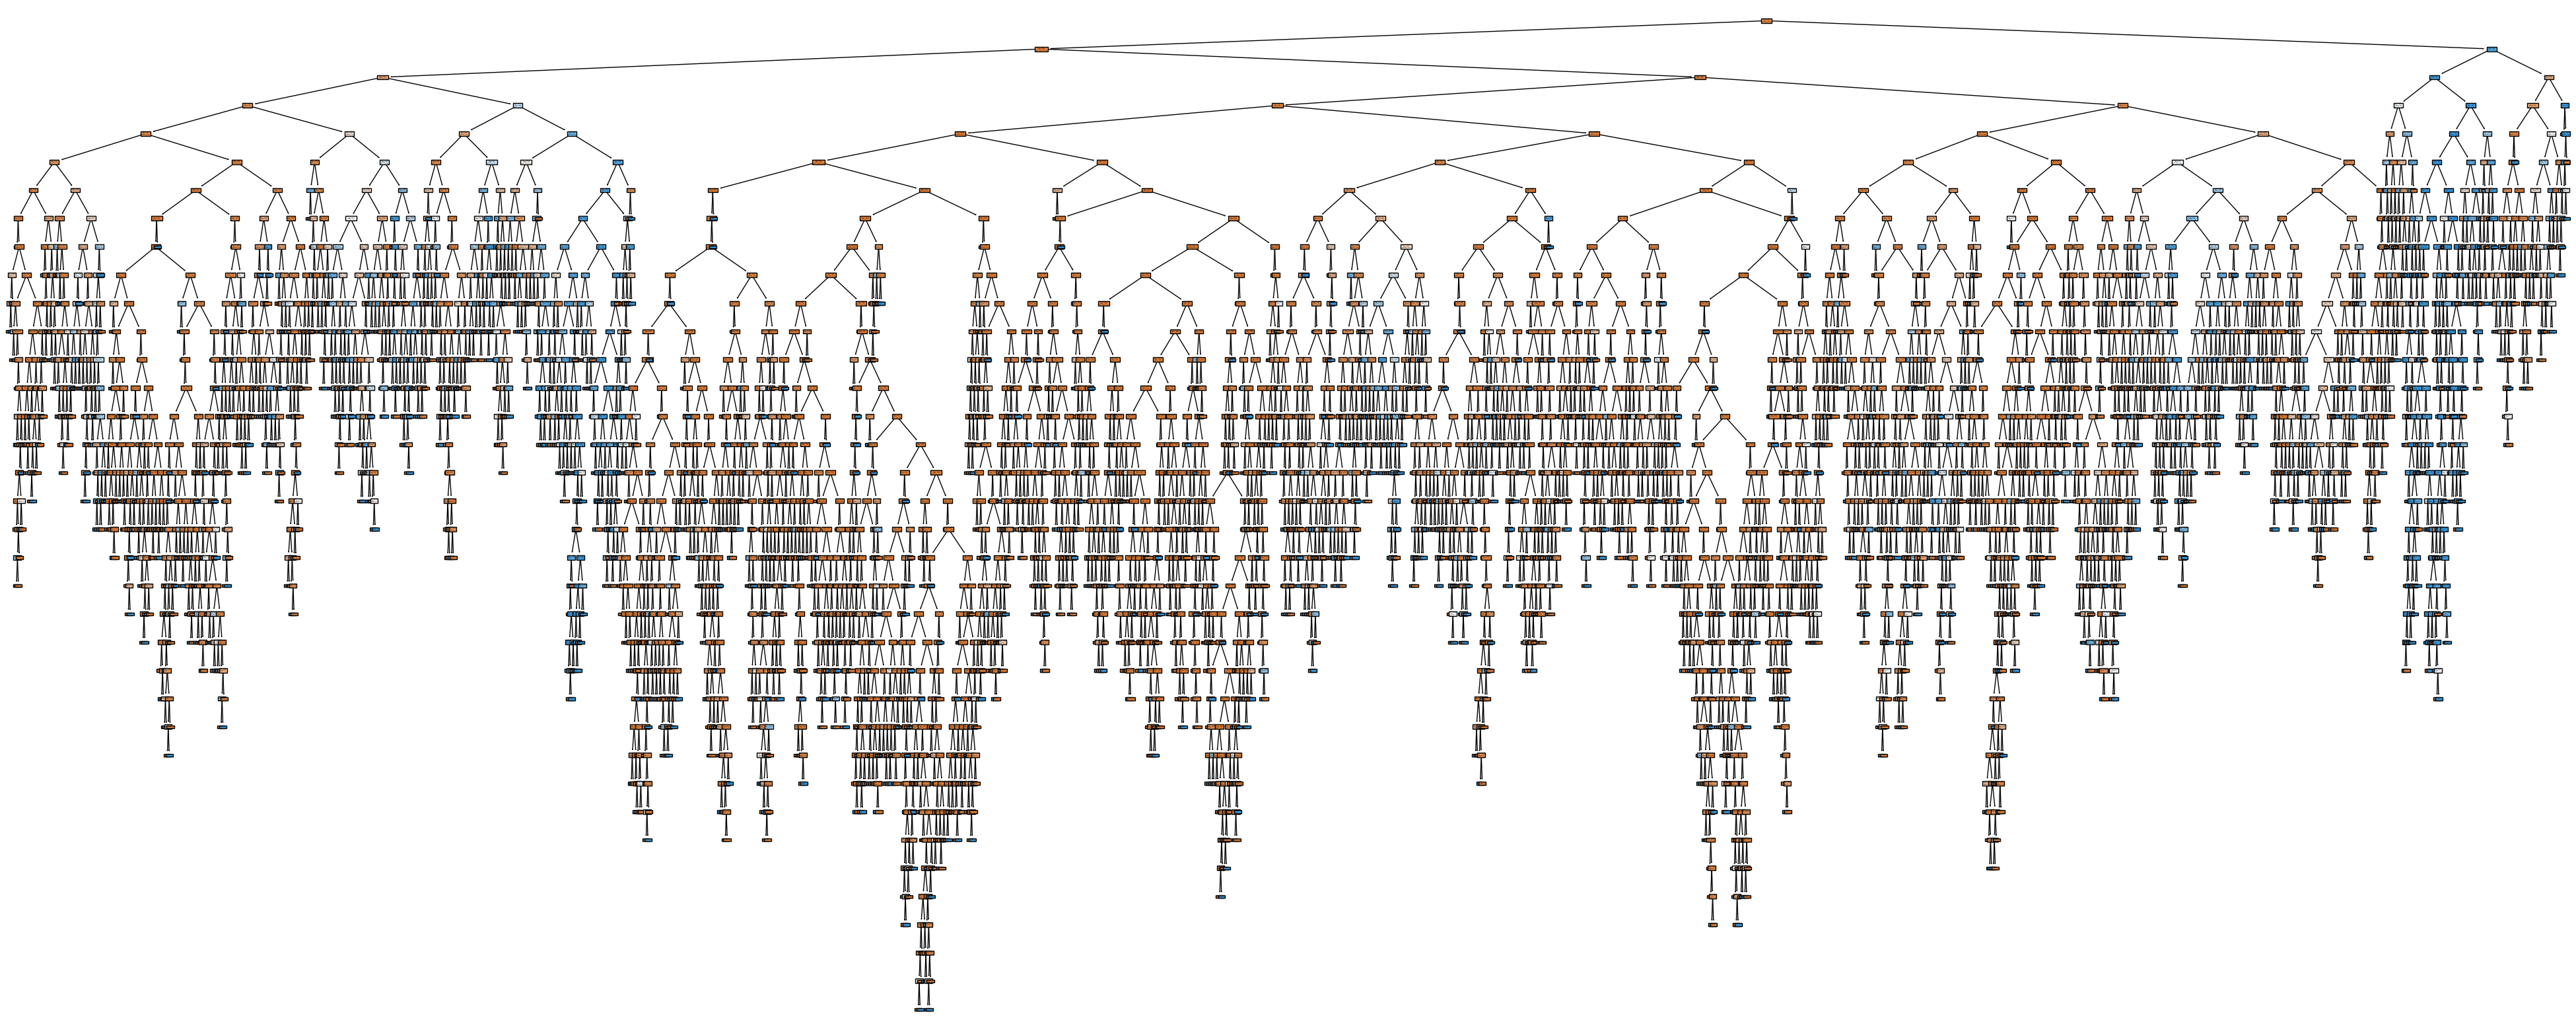

In [96]:
x_ext_sinna_9=x_ext_sinna.iloc[:,:9]

clf_ruido=DecisionTreeClassifier(random_state=123)
clf_ruido.fit(x_ext_sinna_9,y_ext_sinna)
plt.figure(figsize=(50, 20))
plot_tree(clf_ruido, filled=True) #feature_names=["x"],class_names=["0","1"], filled=True)
plt.show()

Con filas sustituidas

In [29]:

def plot_confusion_matrix(model, X_test, y_test, y_pred_external=None, title="Matriz de confusión"):
    # Predicciones del modelo
    if y_pred_external is not None:
        y_pred = y_pred_external
    else:
        y_pred = model.predict(X_test)
        # For models like neural networks that output probabilities, binarize them
        if hasattr(model, 'predict_proba'): # Check if it's a classifier that gives probabilities
            if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
                y_pred = y_pred.argmax(axis=1) # For multiclass
            else:
                y_pred = (y_pred >= 0.5).astype(int) # For binary
        elif hasattr(model, 'decision_function'): # For some models that output scores
             y_pred = (y_pred >= 0).astype(int)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Gráfico bonito con seaborn
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [24]:
# df YA es el DataFrame limpio
target_col = "target"

# Todas las features (todas las columnas menos target)
all_features = [col for col in df.columns if col != target_col]

X_full = df[all_features]
y = df[target_col]

# ==========================================
# 2) Seleccionar las más correlacionadas
# ==========================================

corr_with_target = df.corr()[target_col].drop(target_col)
print("Correlaciones con target:")
print(corr_with_target.sort_values(ascending=False))

umbral_corr = 0.19
selected_features = corr_with_target[corr_with_target.abs() >= umbral_corr].index.tolist()

print("\nFeatures seleccionadas (|corr| >= umbral):")
print(selected_features)

X_sel = df[selected_features]

#Mismo train/test para ambos conjuntos

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Usamos los mismos índices para la versión reducida
X_train_sel = X_sel.loc[X_train_full.index]
X_test_sel  = X_sel.loc[X_test_full.index]

# ==========================================
# 4) Función auxiliar para entrenar y evaluar
# ==========================================

def train_and_eval(X_train, X_test, y_train, y_test, name=""):
    clf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="binary")  # para target 0/1

    print(f"\n===== Modelo {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    return clf

# Entrenar y comparar

model_full = train_and_eval(
    X_train_full, X_test_full, y_train, y_test,
    name="RandomForest - TODAS las vars"
)

model_sel = train_and_eval(
    X_train_sel, X_test_sel, y_train, y_test,
    name="RandomForest - SOLO vars correlacionadas"
)

Correlaciones con target:
var3     0.587355
var4     0.527318
var10    0.386960
var6     0.361254
var5     0.296133
var8    -0.192970
var2    -0.268571
var7    -0.285895
var1    -0.495295
var9          NaN
Name: target, dtype: float64

Features seleccionadas (|corr| >= umbral):
['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var10']

===== Modelo RandomForest - TODAS las vars =====
Accuracy: 0.9647
F1-score: 0.7793
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15788
           1       0.91      0.68      0.78      1594

    accuracy                           0.96     17382
   macro avg       0.94      0.84      0.88     17382
weighted avg       0.96      0.96      0.96     17382


===== Modelo RandomForest - SOLO vars correlacionadas =====
Accuracy: 0.9646
F1-score: 0.7781
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0

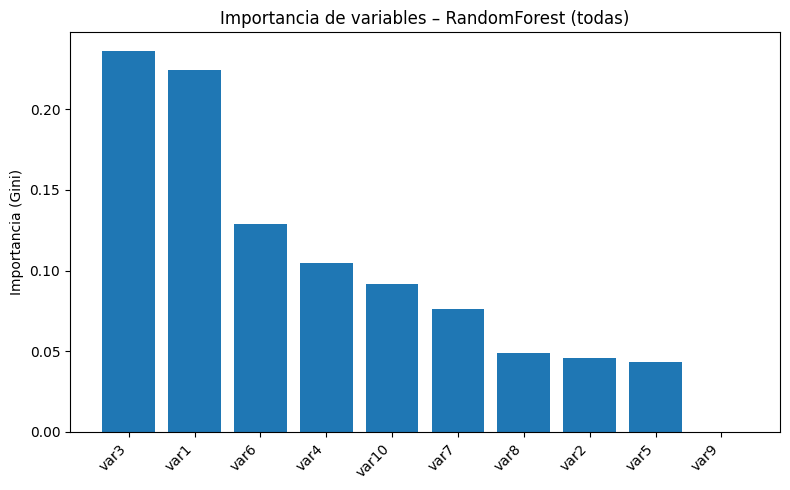

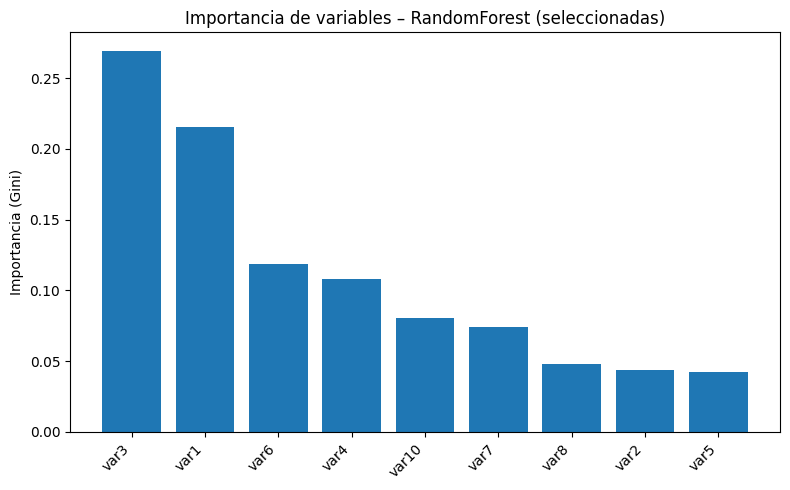

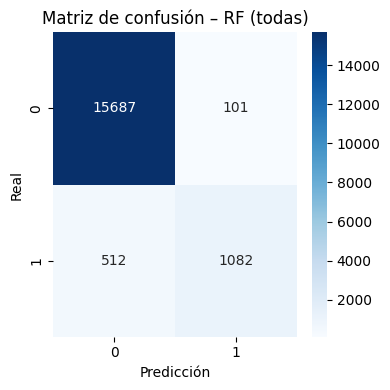

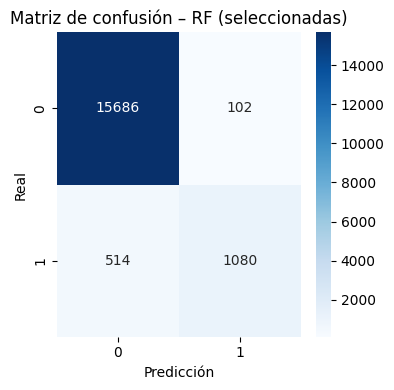

In [25]:
def plot_feature_importances(model, feature_names, title="Importancia de variables"):
    importances = model.feature_importances_
    idx = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 5))
    plt.bar(range(len(importances)), importances[idx])
    plt.xticks(range(len(importances)), np.array(feature_names)[idx], rotation=45, ha="right")
    plt.title(title)
    plt.ylabel("Importancia (Gini)")
    plt.tight_layout()
    plt.show()

# Importancias usando todas las variables
plot_feature_importances(model_full, X_full.columns,
                         "Importancia de variables – RandomForest (todas)")

# Importancias usando solo variables seleccionadas
plot_feature_importances(model_sel, X_sel.columns,
                         "Importancia de variables – RandomForest (seleccionadas)")
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion(model, X_test, y_test, title="Matriz de confusión"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_confusion(model_full, X_test_full, y_test,
               "Matriz de confusión – RF (todas)")
plot_confusion(model_sel, X_test_sel, y_test,
               "Matriz de confusión – RF (seleccionadas)")



===== CV (5-fold) – RandomForest – TODAS las vars =====
Accuracy: media=0.9656, std=0.0008
F1-score: media=0.7846, std=0.0059

===== CV (5-fold) – RandomForest – SOLO vars correlacionadas =====
Accuracy: media=0.9653, std=0.0009
F1-score: media=0.7829, std=0.0065


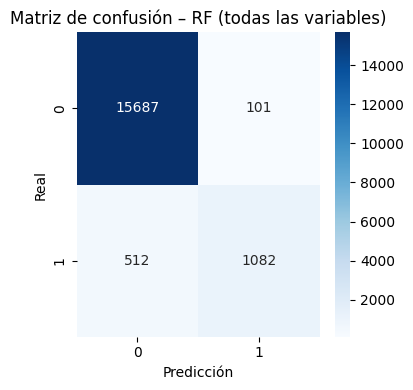

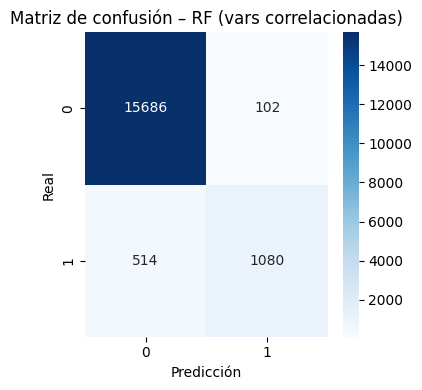

NameError: name 'clf_tree_full' is not defined

In [26]:
def cv_evaluate_tree_model(model, X, y, k=5, name=""):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    acc_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    f1_scores  = cross_val_score(model, X, y, cv=cv, scoring="f1")

    print(f"\n===== CV ({k}-fold) – {name} =====")
    print(f"Accuracy: media={acc_scores.mean():.4f}, std={acc_scores.std():.4f}")
    print(f"F1-score: media={f1_scores.mean():.4f}, std={f1_scores.std():.4f}")

# Random Forest con todas las variables
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

cv_evaluate_tree_model(rf, X_full, y, k=5,
                       name="RandomForest – TODAS las vars")

# Random Forest con solo variables seleccionadas
cv_evaluate_tree_model(rf, X_sel, y, k=5,
                       name="RandomForest – SOLO vars correlacionadas")



# Random Forest con TODAS las variables
plot_confusion_matrix(
    model_full,
    X_test_full,
    y_test,
    title="Matriz de confusión – RF (todas las variables)"
)

# Random Forest con SOLO variables correlacionadas
plot_confusion_matrix(
    model_sel,
    X_test_sel,
    y_test,
    title="Matriz de confusión – RF (vars correlacionadas)"
)



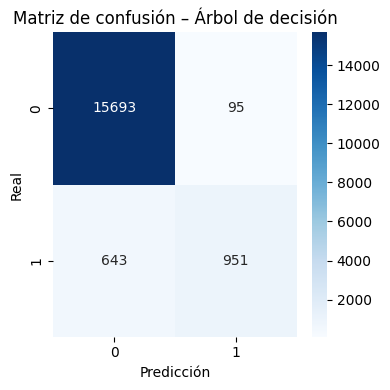

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf_tree_full = DecisionTreeClassifier(
    max_depth=4,
    random_state=123
)
clf_tree_full.fit(X_train_full, y_train)

plot_confusion_matrix(
    clf_tree_full,
    X_test_full,
    y_test,
    title="Matriz de confusión – Árbol de decisión"
)



===== CV (5-fold) – Gradient Boosting – vars seleccionadas =====
Accuracy: media=0.9649, std=0.0009
F1-score: media=0.7831, std=0.0068


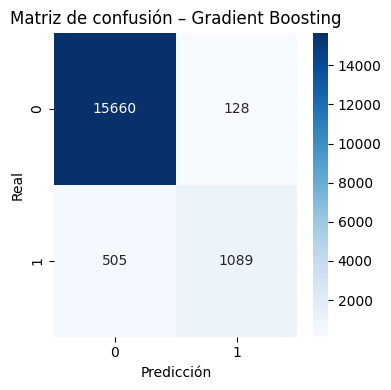

In [34]:
gb = GradientBoostingClassifier(random_state=42)

cv_evaluate_tree_model(gb, X_sel, y, k=5,
                       name="Gradient Boosting – vars seleccionadas")

# Fit the GradientBoostingClassifier before plotting the confusion matrix
gb.fit(X_train_sel, y_train)

plot_confusion_matrix(
    gb,
    X_test_sel,
    y_test,
    title="Matriz de confusión – Gradient Boosting"
)

544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

===== Red neuronal (MLP) =====
Accuracy: 0.9650
F1-score: 0.7853


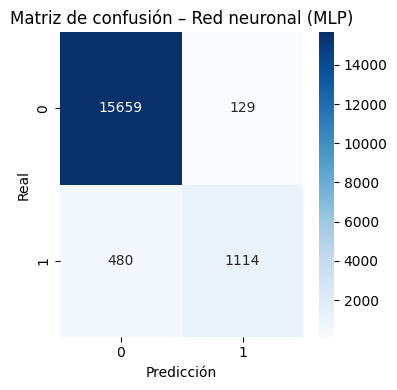

In [30]:
# 1) Train/test split
X_train, X_test, y_train_nn, y_test_nn = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Escalado (muy importante para redes)
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_test_scaled  = scaler_nn.transform(X_test)

# 3) Definir la red neuronal
model_nn = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # salida binaria
])

model_nn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# 4) Entrenar
history = model_nn.fit(
    X_train_scaled, y_train_nn,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=0
)

# 5) Evaluar

y_pred_proba = model_nn.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_proba >= 0.5).astype(int)

acc_nn = accuracy_score(y_test_nn, y_pred_nn)
f1_nn  = f1_score(y_test_nn, y_pred_nn)

print("\n===== Red neuronal (MLP) =====")
print(f"Accuracy: {acc_nn:.4f}")
print(f"F1-score: {f1_nn:.4f}")


plot_confusion_matrix(
    model_nn,
    X_test_scaled,
    y_test_nn,
    y_pred_external=y_pred_nn, # Pass the binarized predictions
    title="Matriz de confusión – Red neuronal (MLP)"
)
